# Лабораторная работа № 3


In [699]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

## Модель DecisionTreeClassifier 

In [700]:
# Загрузка данных и выделение целевого столбца 
data = pd.read_csv("arrhythmia.csv",sep=';')
X = data.drop('CLASS', axis=1)
y = data['CLASS']

In [701]:
# Разбиение на тренировочную и тестовую группы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values

In [702]:
# Построение полного дерева 
clf = DecisionTreeClassifier() # max_depth = 3, max_features = 20, min_samples_leaf = 5
clf = clf.fit(X_train, y_train)

In [703]:
# Определение точности модели
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели: {:.2f}%".format(accuracy * 100))

Точность модели: 65.44%


## Исследование влияния гиперпараметров

### Точность при различной максисмальной глубине (у полного дерева глубина 17, точность 66.18%): 

3 – 66.12%, 4 - 63.37%, 5 - 67.69%, 6 - 65.11%, 7 - 69.91%, 8 - 69.44%, 9 - 67.38%, 10 - 64.48%, 11 - 67.56%, 12 - 67.47%, 13 - 69.45%, 14 - 64.91%, 15 - 70.35%, 16 - 63.07%

Как можно заметить, точность не сильно изменяется от изменения максимальной глубины и скорее всего на точность влияет разбиение на обучающую и тестовую группы. 

### Точность при различном количестве признаков: 

5 - 53.82%, 8 - 56.33%, 10 - 55.42%, 13 - 54.11%, 15 - 60.81%, 20 - 54.74%, 30 - 48.13%, 40 - 63.14%, 50 - 62.5%, 100 - 60.63%

Зависимость точности от максимального количества признаков так же не наблюдается. 

### Точность при различном минимальном числе объектов в листе: 

5 - 67.49%, 10 - 66.23%, 15 - 64.84%, 20 - 64.18%, 30 - 64.04%, 40 - 61.39%, 50 - 60.27%, 100 - 53.55%

Зависимость точности от максимального количества признаков так же не наблюдается. Но наблюдается, что при большем количестве объектов в листе алгоритм определяет все объекты в 8 класс. 

## Визуализация дерева

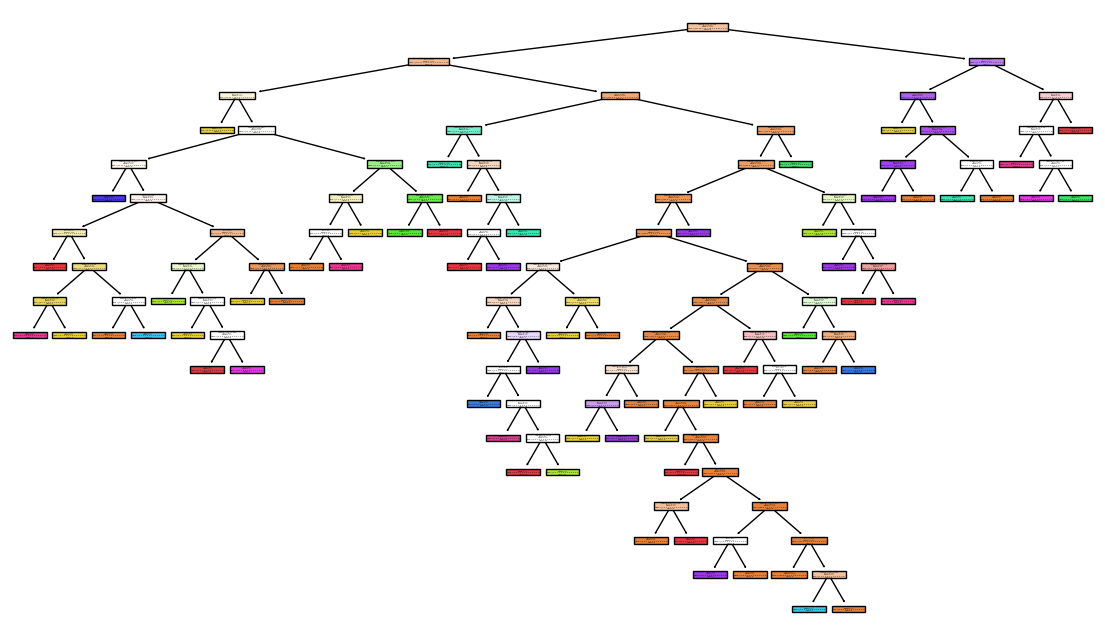

In [704]:
# Визуализация структуры дерева решений
plt.figure(figsize=(14, 8))
list = X.columns.to_list()
class_list = y.unique().tolist()
for i in range(len(class_list)):
  class_list[i] = str(class_list[i])
plot_tree(clf, filled=True, feature_names=list, class_names=class_list)
plt.show()

### Показатели, участвующие в структуре дерева

Корневой элемент: channel V1.16

Признаки учавствующие в построении дерева: channel V5.2, channels DIII.1, channel V1.15, channel AVL.12, Heart rate, channel DIII.9, channel V3.15, channel V3.18, R wave.1, channel DII.16, channel V6.2, channel V2.15, channel V6.19, channel DII.5, channel V3.21, channel AVL.19, Weight, P wave, channel V3.19, channel V5.21, R wave, channel V3.20, channel V2.19, channel DII.15, QRS, channel V1.16, QRSTA, QRST, channel DII.21, channel V4.5, T wave, channel AVR.20, channel V1.2, channel DIII, channel V3.5, channel V6.18, QRSA, channel V1.20, channel DIII.6, channel V6.21, channel V2.2, channel V4.15, channel V6.20, channel AVL.18, channel AVF, channel V4.21

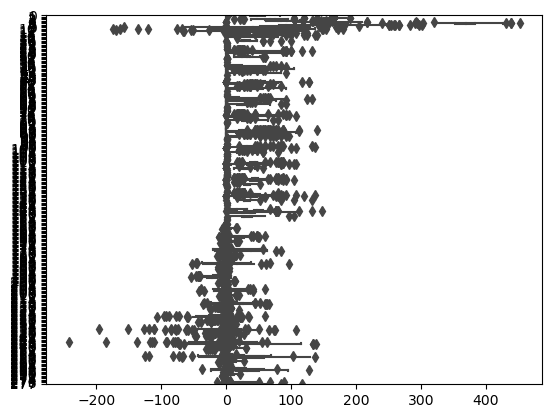

In [705]:
root_class = clf.tree_.value[0].argmax()

X_test = pd.DataFrame(data=X_test)
y_test = pd.DataFrame(data=y_test)

root_class_indices = y_test[y_test == root_class].index
data_subset = X_test.loc[root_class_indices]

sns.boxplot(data=data_subset, orient="h")  
plt.show()

In [706]:
list_param = []
for i in range(len(clf.tree_.feature)):
 list_param.append(X.columns[clf.tree_.feature[i]])
print(set(list_param))

{'channel V2.5', 'channel AVL.12', 'Heart rate', 'channel V3.15', 'channel V1.21', 'channel AVL.21', 'R wave.1', 'P interval', 'channel V6.2', 'channel V2.20', 'channel V6.19', 'channel AVR.5', 'channel V3.21', 'channel DIII.2', 'channel V5.14', 'P wave', 'channel V3.19', 'S wave', 'channel V5.21', 'R wave', 'channel V3.20', 'channel V2.19', 'channel AVF.3', 'QRS', 'channel V1.16', 'channel V2.3', 'QRST', 'channel V5.12', 'channel AVL', 'channel DIII.7', 'T', 'channel DII.21', 'Age', 'channel V3.13', 'QRS duratio', 'channel AVR.20', 'channel V1.2', 'channel V3.5', 'channel V6.18', 'channels DIII', 'channel V4.12', 'channel V1.20', 'channel V6.21', 'channel V6.12', 'channel V4.15', 'channel V6.20', 'channel V5.18', 'channel AVF', 'channel V4.21'}


### Эксперемент с удалением корня

Точность модели: 63.24%


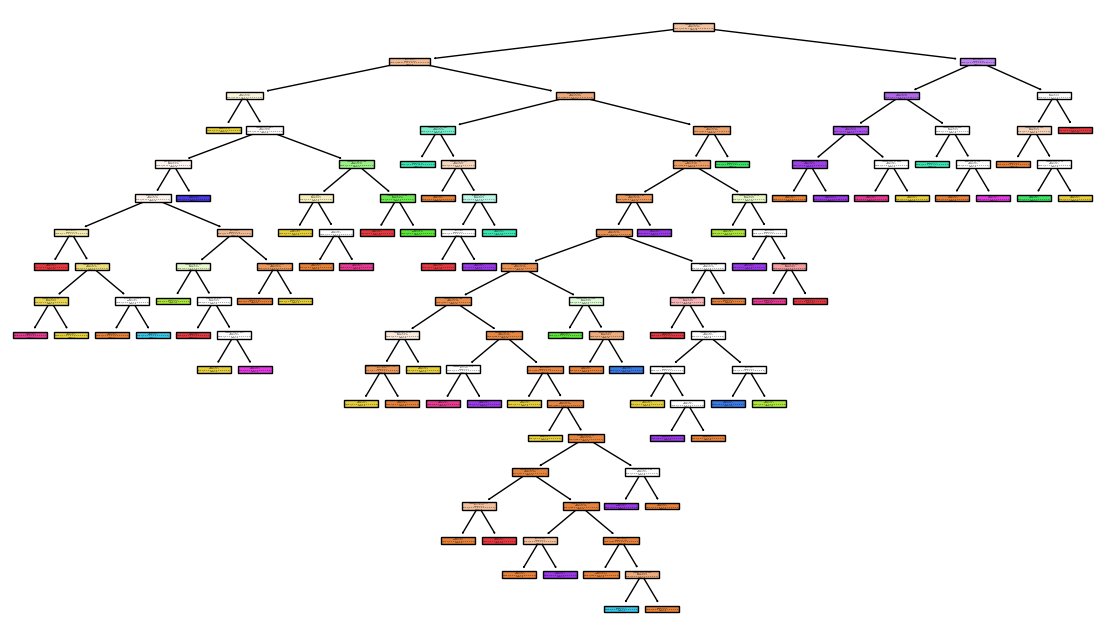

Корневой элемент:  channel V1.3
Список параметров, учавствующих в построении модели:  {'channel DII.14', 'channel V4.21', 'channel V4.19', 'channel V3.14', 'Heart rate', 'channel V3.15', 'channel AVR.18', 'channel DIII.1', 'channel V3.18', 'channel V3.12', 'R wave.1', 'channel AVR.19', 'channel AVR.1', 'channel V6.5', 'channel V2.20', 'channel V2.15', 'channel V6.19', 'channel AVR.5', 'channel V3.21', 'channel V2.21', 'channel V1.13', 'Height', 'channel AVR.21', 'channel V4.18', 'channel V2.16', 'P wave', 'channel V3.19', 'channel V3.20', 'channel V2.19', 'channel DII.15', 'channel V3', 'QRS', 'channel V3.1', 'channel AVL', 'T', 'channel V1.3', 'Q-T interval', 'channel V1.18', 'QRS duratio', 'Number of intrinsic deflections', 'channel V3.5', 'channel V1.2', 'channel V6.14', 'channel V2.12', 'channel V4.12', 'channel V1.12', 'channel V1.20', 'channel DIII.6', 'channel V6.21', 'channel V1.19', 'channel V6.18', 'channel V6.20', 'channel AVF.21', 'S wave.1', 'channel AVF', 'channel AVF.18'

In [707]:
X1 = X.drop('channel V1.16', axis=1)

# Разбиение на тренировочную и тестовую группы
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.3, random_state=1)
X_train1, X_test1, y_train1, y_test1 = X_train1.values, X_test1.values, y_train1.values, y_test1.values

# Построение полного дерева 
clf1 = DecisionTreeClassifier() 
clf1 = clf1.fit(X_train1, y_train1)

# Определение точности модели
y_pred1 = clf1.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("Точность модели: {:.2f}%".format(accuracy1 * 100))

plt.figure(figsize=(14, 8))
list1 = X1.columns.to_list()
class_list1 = y.unique().tolist()
for i in range(len(class_list1)):
  class_list1[i] = str(class_list1[i])
plot_tree(clf1, filled=True, feature_names=list1, class_names=class_list1)
plt.show()

print("Корневой элемент: ", X1.columns[clf1.tree_.feature[0]])
list_param1 = []
for i in range(len(clf1.tree_.feature)):
 list_param1.append(X1.columns[clf1.tree_.feature[i]])
print("Список параметров, учавствующих в построении модели: ",set(list_param1))

## Модель RandomForest 

In [708]:
# Загрузка датасета
X = data.drop("CLASS", axis=1)
y = data["CLASS"]

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели случайного леса
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучение модели на обучающем наборе
rf_model.fit(X_train, y_train)

# Тестирование на тестовом наборе
y_pred = rf_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели случайного леса: {:.2f}%".format(accuracy * 100))

Точность модели случайного леса: 69.23%


## Исследование влияния гиперпараметров

### Число деревьев

In [709]:
# Модель с 5 деревьями
model1 = RandomForestClassifier(n_estimators=5, random_state=42)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print("Модель 1: Точность на тестовом наборе данных: {:.2f}%".format(accuracy1 * 100))

# Модель с 10 деревьями
model2 = RandomForestClassifier(n_estimators=10, random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Модель 2: Точность на тестовом наборе данных: {:.2f}%".format(accuracy2 * 100))

# Модель с 50 деревьями
model3 = RandomForestClassifier(n_estimators=50, random_state=42)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Модель 3: Точность на тестовом наборе данных: {:.2f}%".format(accuracy3 * 100))

# Модель с 500 деревьями
model4 = RandomForestClassifier(n_estimators=500, random_state=42)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print("Модель 4: Точность на тестовом наборе данных: {:.2f}%".format(accuracy4 * 100))

# Модель с 1000 деревьями
model5 = RandomForestClassifier(n_estimators=1000, random_state=42)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
accuracy5 = accuracy_score(y_test, y_pred5)
print("Модель 5: Точность на тестовом наборе данных: {:.2f}%".format(accuracy5 * 100))

Модель 1: Точность на тестовом наборе данных: 58.24%
Модель 2: Точность на тестовом наборе данных: 62.64%
Модель 3: Точность на тестовом наборе данных: 69.23%
Модель 4: Точность на тестовом наборе данных: 69.23%
Модель 5: Точность на тестовом наборе данных: 69.23%


### Число отбираемых показателей

In [710]:
# Модель с 1 признаками
model1 = RandomForestClassifier(max_features=1, random_state=42)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print("Модель 1: Точность на тестовом наборе данных: {:.2f}%".format(accuracy1 * 100))

# Модель с 5 признаками
model2 = RandomForestClassifier(max_features=5, random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Модель 2: Точность на тестовом наборе данных: {:.2f}%".format(accuracy2 * 100))

# Модель с 20 признаками
model3 = RandomForestClassifier(max_features=20, random_state=42)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Модель 3: Точность на тестовом наборе данных: {:.2f}%".format(accuracy3 * 100))

# Модель с 50 признаками
model4 = RandomForestClassifier(max_features=50, random_state=42)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print("Модель 4: Точность на тестовом наборе данных: {:.2f}%".format(accuracy4 * 100))

# Модель с 100 признаками
model5 = RandomForestClassifier(max_features=100, random_state=42)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
accuracy5 = accuracy_score(y_test, y_pred5)
print("Модель 5: Точность на тестовом наборе данных: {:.2f}%".format(accuracy5 * 100))

Модель 1: Точность на тестовом наборе данных: 58.24%
Модель 2: Точность на тестовом наборе данных: 65.93%
Модель 3: Точность на тестовом наборе данных: 69.23%
Модель 4: Точность на тестовом наборе данных: 75.82%
Модель 5: Точность на тестовом наборе данных: 78.02%


### Построение полных\ограниченных деревьев

In [711]:
# Модель с глубиной 3
model1 = RandomForestClassifier(max_depth=3, random_state=42)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print("Модель 1: Точность на тестовом наборе данных: {:.2f}%".format(accuracy1 * 100))

# Модель с глубиной 5
model2 = RandomForestClassifier(max_depth=5, random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Модель 2: Точность на тестовом наборе данных: {:.2f}%".format(accuracy2 * 100))

# Модель с глубиной 10
model3 = RandomForestClassifier(max_depth=10, random_state=42)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Модель 3: Точность на тестовом наборе данных: {:.2f}%".format(accuracy3 * 100))

# Модель с глубиной 15
model4 = RandomForestClassifier(max_depth=15, random_state=42)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print("Модель 4: Точность на тестовом наборе данных: {:.2f}%".format(accuracy4 * 100))

# Модель с глубиной 20
model5 = RandomForestClassifier(max_depth=20, random_state=42)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
accuracy5 = accuracy_score(y_test, y_pred5)
print("Модель 5: Точность на тестовом наборе данных: {:.2f}%".format(accuracy5 * 100))

Модель 1: Точность на тестовом наборе данных: 56.04%
Модель 2: Точность на тестовом наборе данных: 68.13%
Модель 3: Точность на тестовом наборе данных: 67.03%
Модель 4: Точность на тестовом наборе данных: 68.13%
Модель 5: Точность на тестовом наборе данных: 69.23%


По результатам, наибольшее влияние на точность построения модели влияет количество отбираемых признаков.

## Структура 3 деревьев решений

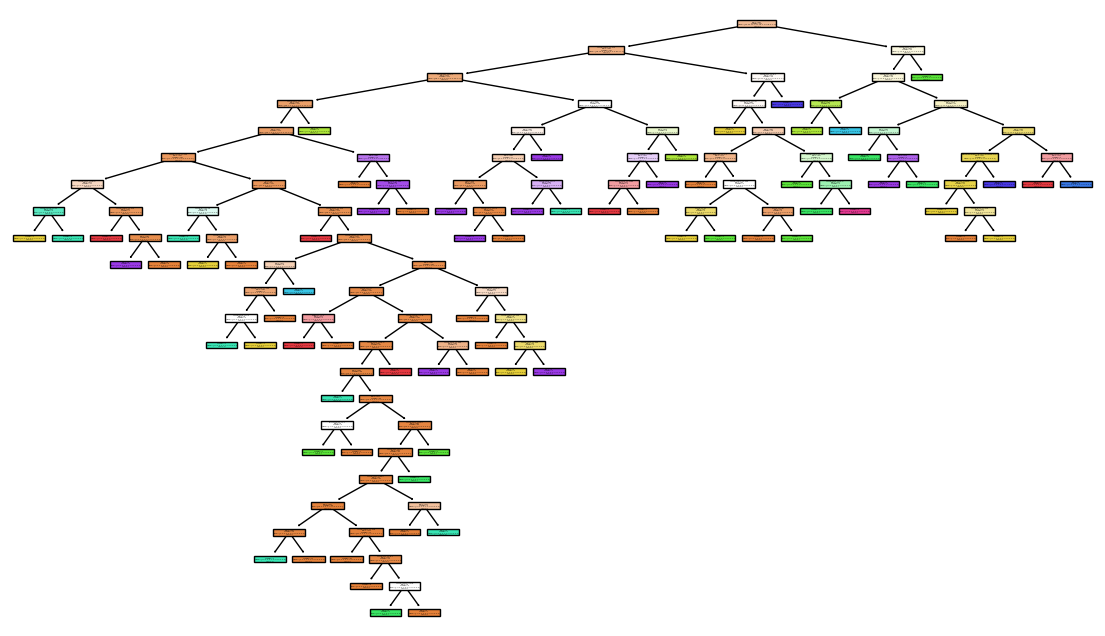

In [712]:
trees = rf_model.estimators_

plt.figure(figsize=(14, 8))
list = X.columns.to_list()
class_list = y.unique().tolist()
for i in range(len(class_list)):
  class_list[i] = str(class_list[i])
plot_tree(trees[0], filled=True, feature_names=list, class_names=class_list)
plt.show()

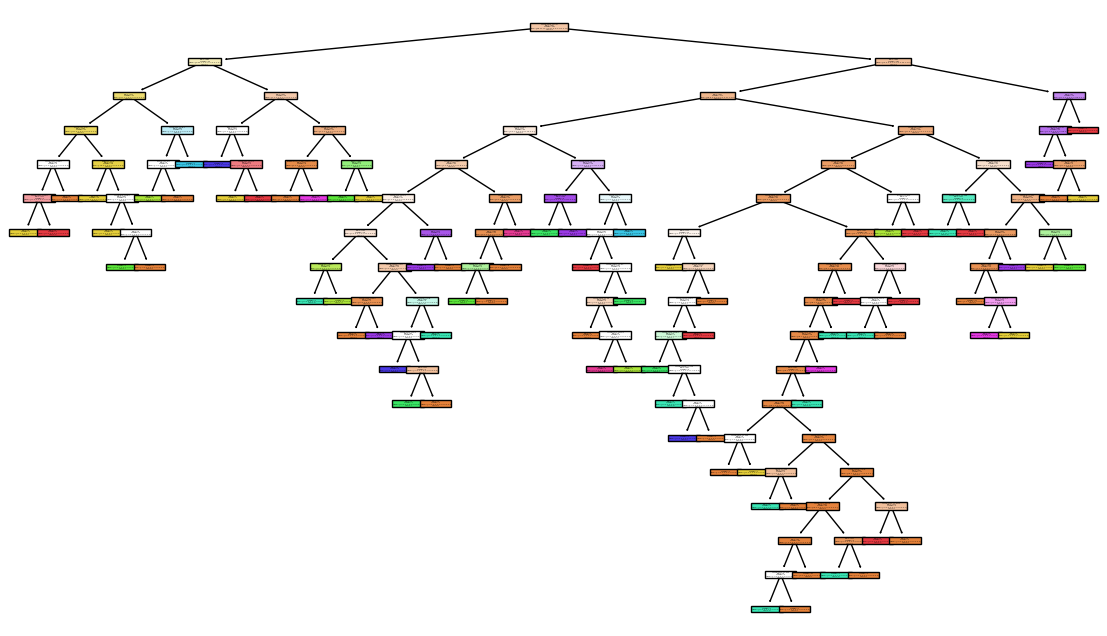

In [713]:
plt.figure(figsize=(14, 8))
list = X.columns.to_list()
class_list = y.unique().tolist()
for i in range(len(class_list)):
  class_list[i] = str(class_list[i])
plot_tree(trees[1], filled=True, feature_names=list, class_names=class_list)
plt.show()

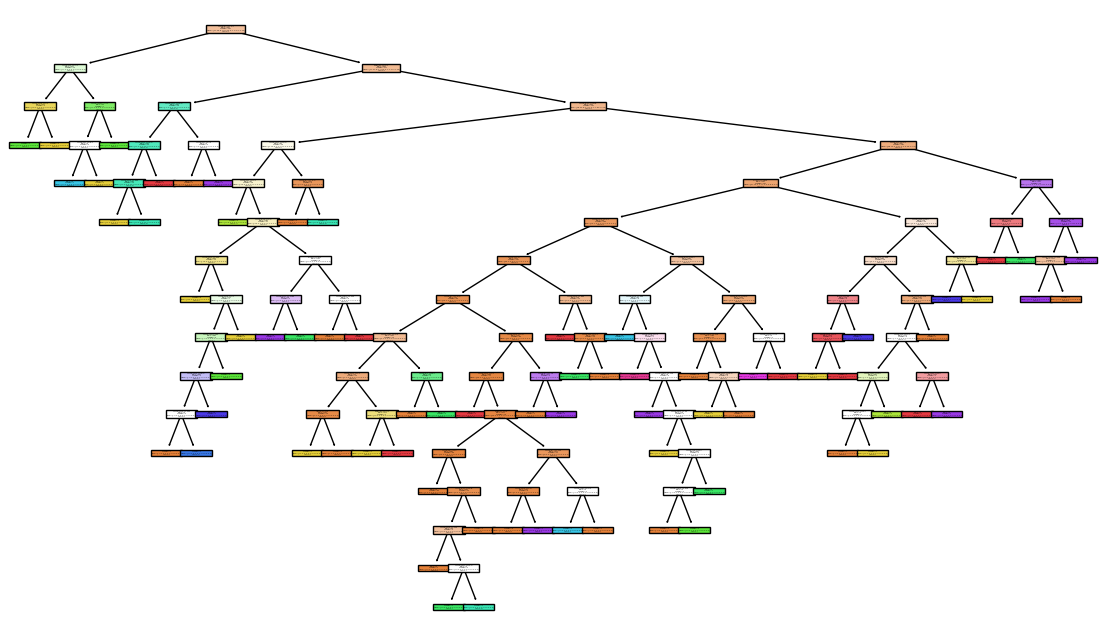

In [714]:
plt.figure(figsize=(14, 8))
list = X.columns.to_list()
class_list = y.unique().tolist()
for i in range(len(class_list)):
  class_list[i] = str(class_list[i])
plot_tree(trees[2], filled=True, feature_names=list, class_names=class_list)
plt.show()

### Оценки важности показателей

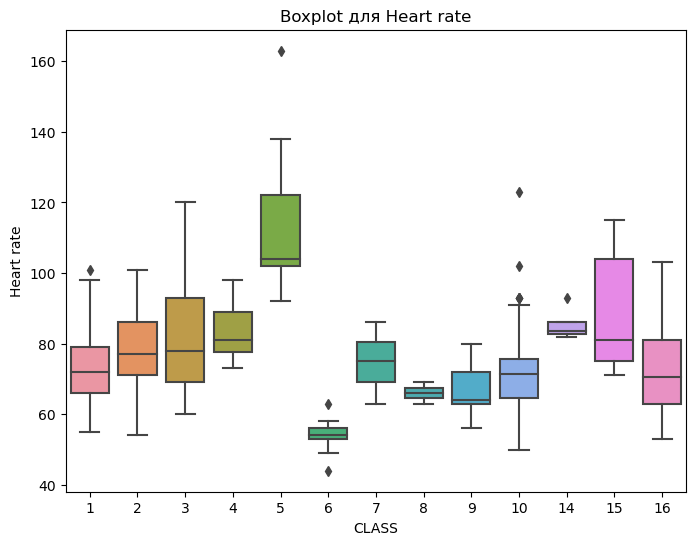

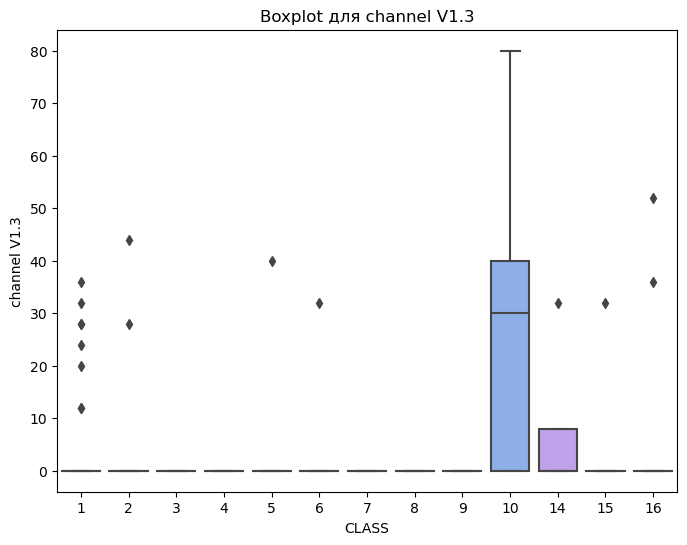

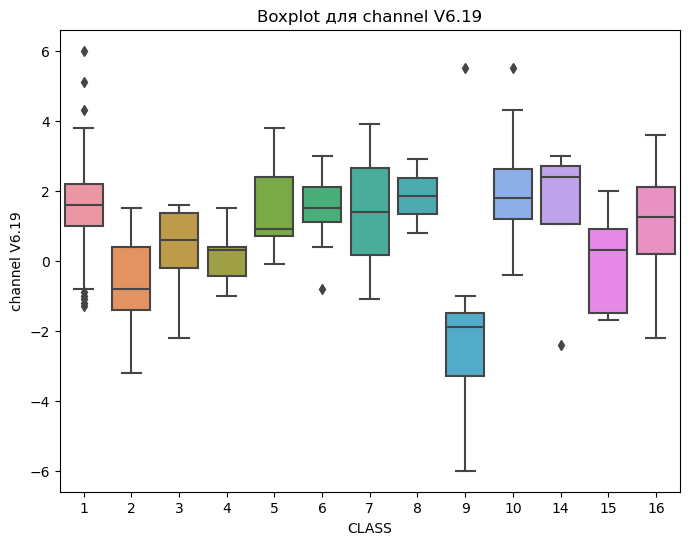

In [715]:
feature_importance = rf_model.feature_importances_

# Создание датафрейма для удобства
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Сортировка признаков по важности в убывающем порядке
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Выбор трех признаков с наибольшей оценкой важности
top_features = importance_df.head(3)

# Создание диаграмм с группировкой по классу (boxplot)
for feature in top_features['Feature']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='CLASS', y=feature, data=data)
    plt.title(f'Boxplot для {feature}')
    plt.show()

## Три модели классификации одного типа на разном наборе показателей

In [716]:
# Полный набор данных
X_full = data.drop("CLASS", axis=1)

# Получим оценки важности признаков
feature_importance = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_full.columns, 'Importance': feature_importance})

# Сортируем признаки по важности в убывающем порядке
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Выбераем 30% признаков с наибольшей и наименьшей оценкой важности
num_features = len(X_full.columns)
num_selected_features = int(0.3 * num_features)

top_features = importance_df.head(num_selected_features)
bottom_features = importance_df.tail(num_selected_features)

# Получим наборы данных для моделей
X_top_features = X_full[top_features['Feature']]
X_bottom_features = X_full[bottom_features['Feature']]

In [717]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top_features, y, test_size=0.2, random_state=42)
X_train_bottom, X_test_bottom, y_train_bottom, y_test_bottom = train_test_split(X_bottom_features, y, test_size=0.2, random_state=42)

# Создание и обучение трех моделей Decision Tree
tree_full = DecisionTreeClassifier()
tree_top = DecisionTreeClassifier()
tree_bottom = DecisionTreeClassifier()

tree_full.fit(X_train, y_train)
tree_top.fit(X_train_top, y_train_top)
tree_bottom.fit(X_train_bottom, y_train_bottom)

# Оценка точности моделей
accuracy_full = accuracy_score(y_test, tree_full.predict(X_test))
accuracy_top = accuracy_score(y_test_top, tree_top.predict(X_test_top))
accuracy_bottom = accuracy_score(y_test_bottom, tree_bottom.predict(X_test_bottom))

print("Точность модели: {:.2f}%".format(accuracy_full * 100))
print("Точность модели: {:.2f}%".format(accuracy_top * 100))
print("Точность модели: {:.2f}%".format(accuracy_bottom * 100))

Точность модели: 59.34%
Точность модели: 65.93%
Точность модели: 48.35%


## Построение моделм с бустингом

In [718]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

# Создание базовой модели (Decision Tree)
base_model = DecisionTreeClassifier(max_depth=3)

# Создание модели AdaBoost
adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

# Обучение модель
adaboost_model.fit(X_train, y_train)

# Тестрирование на тестовом наборе
y_pred = adaboost_model.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели: {:.2f}%".format(accuracy * 100))

Точность модели: 71.43%
